In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline
plt.style.use('classic')
plt.rc('font',weight='bold')

In [2]:
export_path = '/home/dhense/PublicData/Economic_analysis/'
df = pd.read_csv(export_path+'unemployment_stats.csv')
df_self = pd.read_csv(export_path+'self_stats.csv')
df_perc = pd.read_csv(export_path+'perc_stats.csv')
df_sub = pd.read_csv(export_path+'subpop_data.csv')

df_state = pd.read_csv('/home/dhense/PublicData/Economic_analysis/popest.csv')
df_pops = pd.read_csv('/home/dhense/PublicData/Economic_analysis/popest_demo.csv')
df_proj = pd.read_csv('/home/dhense/PublicData/Economic_analysis/popproj.csv')

In [3]:
df

,Year,Month,U3_Rate,U3_LFPR,U6_Rate,U6_LFPR,Self_Rate
0,1999,jan,0.049205,0.661934,0.086336,0.677456,0.206108
1,1999,feb,0.048238,0.664233,0.085197,0.679858,0.203046
2,1999,mar,0.045674,0.664360,0.084619,0.680365,0.204160
3,1999,apr,0.042393,0.662330,0.080846,0.679178,0.199398
4,1999,may,0.041167,0.664379,0.080917,0.682524,0.199500
...,...,...,...,...,...,...,...
255,2020,apr,0.143385,0.604776,0.191884,0.628786,0.338264
256,2020,may,0.129243,0.611851,0.180384,0.634660,0.329481
257,2020,jun,0.111435,0.623610,0.164896,0.645814,0.314987
258,2020,jul,0.103323,0.629519,0.155018,0.649034,0.302681


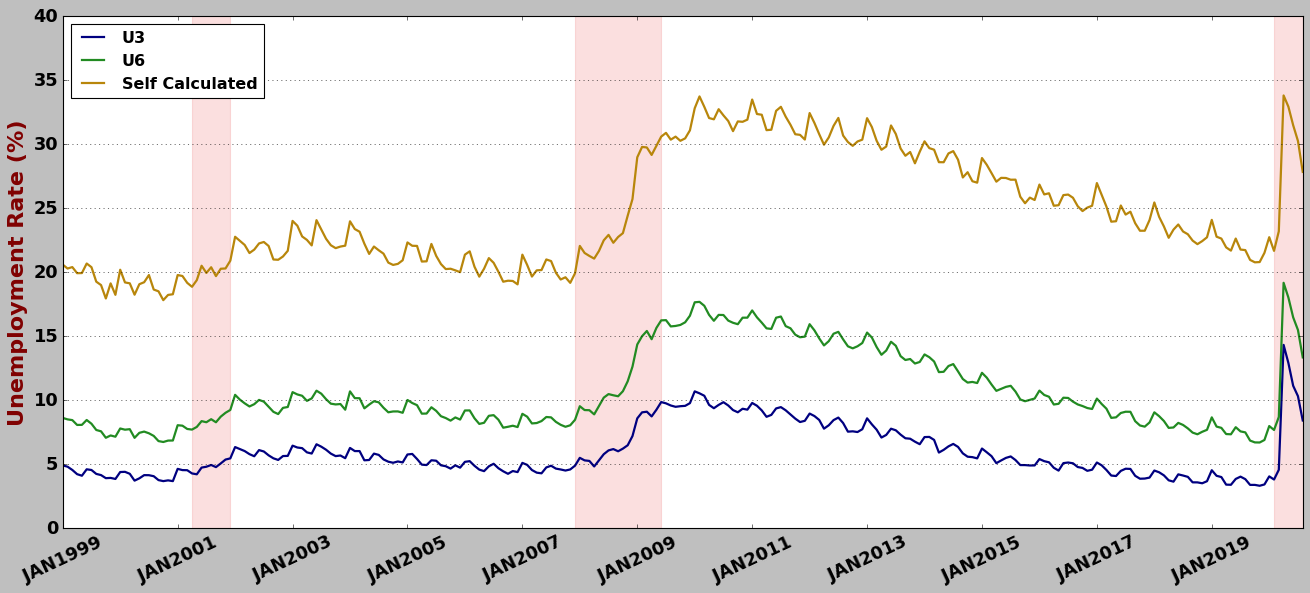

In [30]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['U3_Rate']*100, label='U3', lw=2, color='navy')
ax.plot(df['U6_Rate']*100, label='U6', lw=2, color='forestgreen')
ax.plot(df['Self_Rate']*100, label='Self Calculated', lw=2, color='darkgoldenrod')
ax.set_ylabel('Unemployment Rate (%)', fontsize=20, weight='bold', color='maroon')
ax.legend(loc='upper left')
ax.set_ylim([0,40])

x = np.arange(0,260,24)
plt.xticks(x,['JAN'+str(yr) for yr in range(1999,2020,2)],rotation=25)

ax.margins(x=0)
ax.tick_params(labelsize=16)
ax.yaxis.grid()

ax.fill_between(np.linspace(27,35,19), 0, 100, color='lightcoral', alpha=0.25,
                 interpolate=True)

ax.fill_between(np.linspace(107,125,19), 0, 100, color='lightcoral', alpha=0.25,
                 interpolate=True)

ax.fill_between(np.linspace(253,259,19), 0, 100, color='lightcoral', alpha=0.25,
                 interpolate=True)

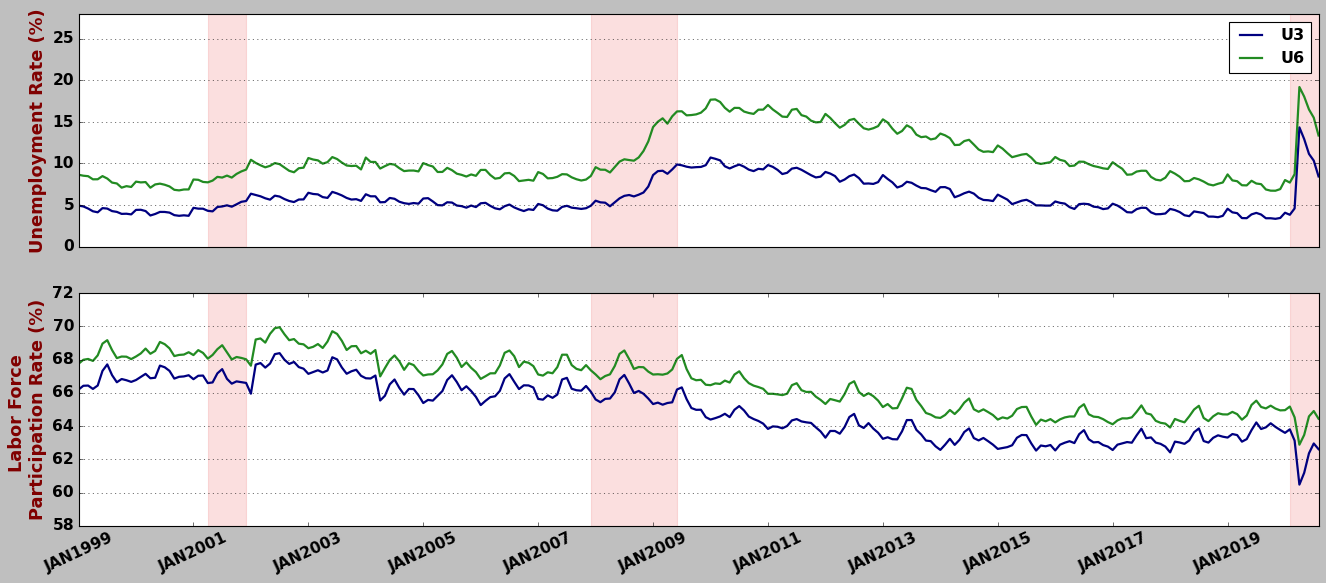

In [5]:
fig, ax = plt.subplots(2,figsize=(20,8))

plt.sca(ax[0])
plt.xticks([], [])

plt.sca(ax[1])
x = np.arange(0,260,24)
plt.xticks(x,['JAN'+str(yr) for yr in range(1999,2020,2)],rotation=25)

ax[0].plot(df['U3_Rate']*100, label='U3',lw=2, color='navy')
ax[0].plot(df['U6_Rate']*100, label='U6',lw=2, color='forestgreen')
ax[0].set_ylabel('Unemployment Rate (%)', fontsize=16, weight='bold', color='maroon')
ax[0].legend()
ax[0].set_ylim([0,28])

ax[1].plot(df['U3_LFPR']*100, label='U3',lw=2, color='navy')
ax[1].plot(df['U6_LFPR']*100, label='U6',lw=2, color='forestgreen')
ax[1].set_ylabel('Labor Force \nParticipation Rate (%)', fontsize=16,weight='bold', color='maroon')
ax[1].set_ylim([58,72])


for i in range(0,2):
    ax[i].margins(x=0)
    ax[i].tick_params(labelsize=14)
    ax[i].yaxis.grid()

    ax[i].fill_between(np.linspace(27,35,19), 0, 100, color='lightcoral', alpha=0.25,
                     interpolate=True)
    
    ax[i].fill_between(np.linspace(107,125,19), 0, 100, color='lightcoral', alpha=0.25,
                     interpolate=True)

    ax[i].fill_between(np.linspace(253,259,19), 0, 100, color='lightcoral', alpha=0.25,
                     interpolate=True)


In [6]:
df_perc.columns

Index(['Year', 'Month', 'perc_nilf', 'perc_retired_nilf', 'perc_disabled_nilf',
       'perc_student_nilf', 'perc_other_nilf', 'perc_unemployed',
       'perc_looking', 'perc_layoff', 'perc_employed', 'perc_employed_ft',
       'perc_employed_pt', 'looking_lf', 'layoff_lf', 'unemployed_lf',
       'employed_ft_lf', 'employed_pt_lf', 'employed_lf',
       'employed_pt_econ_lf', 'employed_pt_nonecon_lf'],
      dtype='object')

(0.0, 260.0)

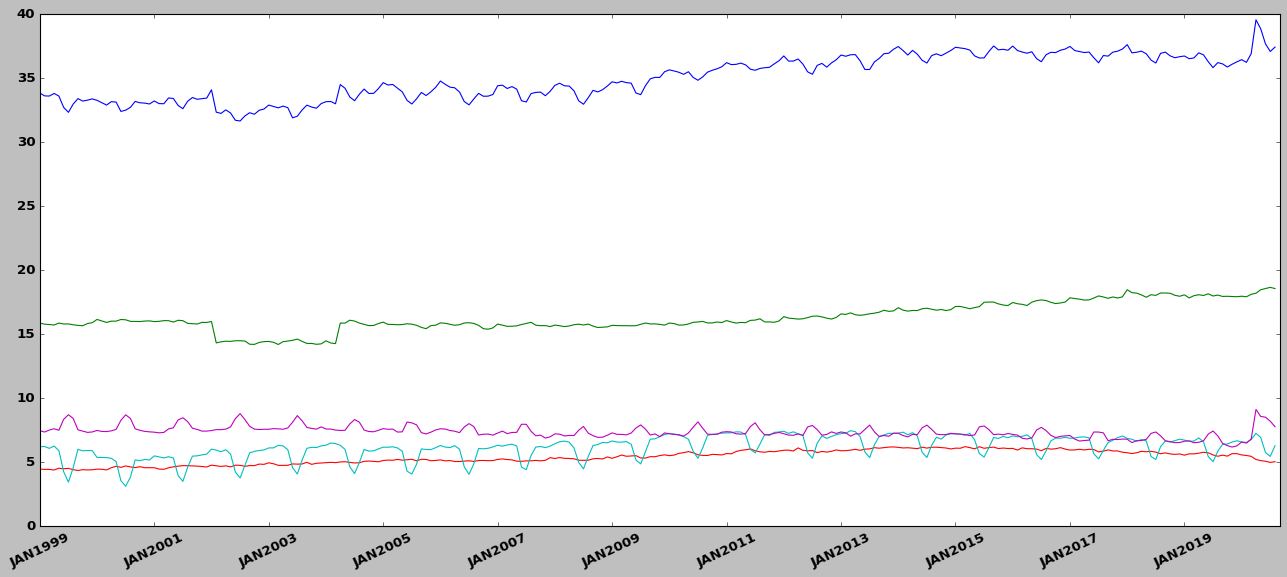

In [7]:
fig, ax = plt.subplots(figsize=(20,8))

plt.plot(df_perc['perc_nilf']*100)
plt.plot(df_perc['perc_retired_nilf']*100)
plt.plot(df_perc['perc_disabled_nilf']*100)
plt.plot(df_perc['perc_student_nilf']*100)
plt.plot(df_perc['perc_other_nilf']*100)

x = np.arange(0,260,24)
plt.xticks(x,['JAN'+str(yr) for yr in range(1999,2020,2)],rotation=25)
plt.xlim([0,260])

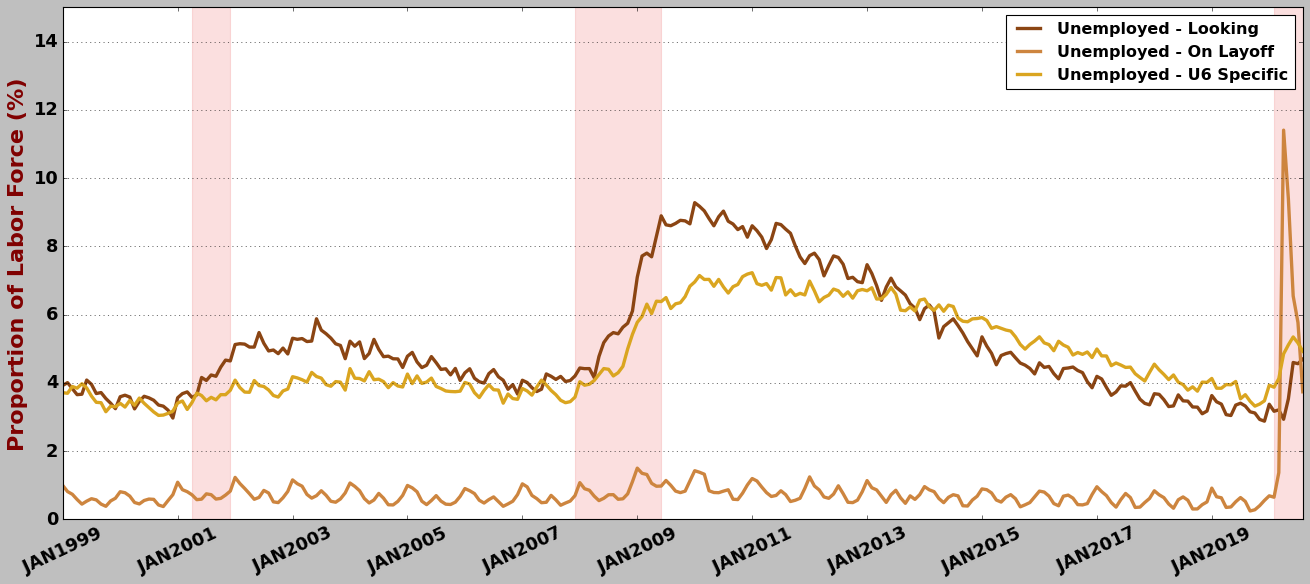

In [8]:
fig, ax = plt.subplots(figsize=(20,8))

plt.plot(df_perc['looking_lf']*100, lw=3, color='saddlebrown',label='Unemployed - Looking')
plt.plot(df_perc['layoff_lf']*100, lw=3, color='peru',label='Unemployed - On Layoff')
plt.plot((df['U6_Rate']-df['U3_Rate'])*100, lw=3, color='goldenrod',label='Unemployed - U6 Specific')

x = np.arange(0,260,24)
plt.xticks(x,['JAN'+str(yr) for yr in range(1999,2020,2)],rotation=25)
plt.xlim([0,259])

ax.margins(x=0)
ax.tick_params(labelsize=16)
ax.yaxis.grid()
ax.legend()

ax.set_ylabel('Proportion of Labor Force (%)', fontsize=20,weight='bold', color='maroon')

ax.fill_between(np.linspace(27,35,19), 0, 15, color='lightcoral', alpha=0.25,
                 interpolate=True)

ax.fill_between(np.linspace(107,125,19), 0, 15, color='lightcoral', alpha=0.25,
                 interpolate=True)

ax.fill_between(np.linspace(253,259,19), 0, 15, color='lightcoral', alpha=0.25,
                 interpolate=True)

In [9]:
df['U6_Rate']-df['U3_Rate']

0      0.037131
1      0.036959
2      0.038945
3      0.038453
4      0.039750
         ...   
255    0.048499
256    0.051141
257    0.053462
258    0.051695
259    0.049273
Length: 260, dtype: float64

In [10]:
df_perc['looking_lf']

0      0.039250
1      0.040076
2      0.038303
3      0.036553
4      0.036684
         ...   
255    0.029342
256    0.035343
257    0.045975
258    0.045627
259    0.046931
Name: looking_lf, Length: 260, dtype: float64

In [11]:
df_self

,Year,Month,Self_Rate,Wage_Component,PT_Component,Disabled_Component,Discouraged_Component
0,1999,jan,0.206108,0.074518,0.043283,0.017874,0.011534
1,1999,feb,0.203046,0.075445,0.040238,0.017716,0.010827
2,1999,mar,0.204160,0.076370,0.042520,0.017696,0.010367
3,1999,apr,0.199398,0.078444,0.037826,0.017580,0.011058
4,1999,may,0.199500,0.076795,0.038498,0.017988,0.010029
...,...,...,...,...,...,...,...
255,2020,apr,0.338264,0.082068,0.061024,0.022465,0.020342
256,2020,may,0.329481,0.081356,0.068722,0.021820,0.020952
257,2020,jun,0.314987,0.082219,0.071901,0.021392,0.020966
258,2020,jul,0.302681,0.079425,0.074409,0.020845,0.016558


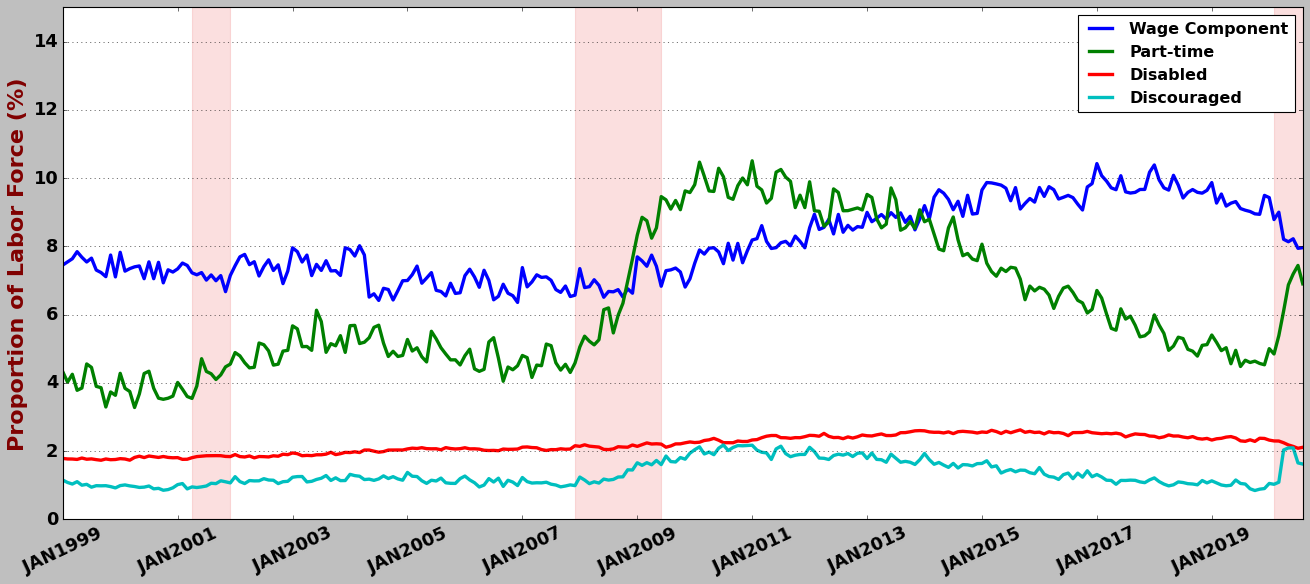

In [12]:
fig, ax = plt.subplots(figsize=(20,8))

# plt.plot(df_perc['looking_lf']*100, lw=3,label='Looking')
# plt.plot(df_perc['layoff_lf']*100, lw=3,label='On Layoff')
plt.plot(df_self['Wage_Component']*100, lw=3,label='Wage Component')
plt.plot(df_self['PT_Component']*100, lw=3,label='Part-time')
plt.plot(df_self['Disabled_Component']*100, lw=3,label='Disabled')
plt.plot(df_self['Discouraged_Component']*100, lw=3,label='Discouraged')


x = np.arange(0,260,24)
plt.xticks(x,['JAN'+str(yr) for yr in range(1999,2020,2)],rotation=25)
# plt.xlim([0,259])

ax.margins(x=0)
ax.tick_params(labelsize=16)
ax.yaxis.grid()
ax.legend()

ax.set_ylabel('Proportion of Labor Force (%)', fontsize=20,weight='bold', color='maroon')

ax.fill_between(np.linspace(27,35,19), 0, 15, color='lightcoral', alpha=0.25,
                 interpolate=True)

ax.fill_between(np.linspace(107,125,19), 0, 15, color='lightcoral', alpha=0.25,
                 interpolate=True)

ax.fill_between(np.linspace(253,259,19), 0, 15, color='lightcoral', alpha=0.25,
                 interpolate=True)

In [13]:
df_proj

,Sex,Race,Hispanic,Year,Age_group,POPESTIMATE_SUB
0,Female,Black Only,Hispanic,2016,1,92881
1,Female,Black Only,Hispanic,2016,10,42810
2,Female,Black Only,Hispanic,2016,11,32013
3,Female,Black Only,Hispanic,2016,12,21653
4,Female,Black Only,Hispanic,2016,13,15009
...,...,...,...,...,...,...
8095,Male,White Only,Not Hispanic,2060,5,5411923
8096,Male,White Only,Not Hispanic,2060,6,5497657
8097,Male,White Only,Not Hispanic,2060,7,5412128
8098,Male,White Only,Not Hispanic,2060,8,5522252


In [14]:
df_state['Race'].value_counts()

White Only    94860
Black Only    94860
Other         94860
Name: Race, dtype: int64

In [15]:
df_proj = df_proj[df_proj['Year']>2018]
df_pop = pd.DataFrame(df_state.groupby(['Sex','Hispanic','Race','Year','Age_group'])['POPESTIMATE_SUB'].sum()).reset_index()
df_pop = df_pop[df_pop['Year']<2019]
df_proj['Race'].value_counts()

White Only    2520
Black Only    2520
Other         2520
Name: Race, dtype: int64

In [16]:
df_population = pd.concat([df_pop,df_proj])
df_population = df_population[(df_population['Year']>1998)&(df_population['Year']<2031)]

In [17]:
def set_estimates(df):
    #Set 2019 pop est by averaging 2013-2018 pop growth rate
    df['POPESTIMATE_SUB'].iloc[29] = int((1+(((df['POPESTIMATE_SUB'].iloc[28]-df['POPESTIMATE_SUB'].iloc[23])
                                        /df['POPESTIMATE_SUB'].iloc[25])/5))*df['POPESTIMATE_SUB'].iloc[28])

    #Set 2020 pop est by averaging 2014-2019 pop growth rate
    df['POPESTIMATE_SUB'].iloc[30] = int((1+(((df['POPESTIMATE_SUB'].iloc[29]-df['POPESTIMATE_SUB'].iloc[24])
                                    /df['POPESTIMATE_SUB'].iloc[24])/5))*df['POPESTIMATE_SUB'].iloc[29])
    return df

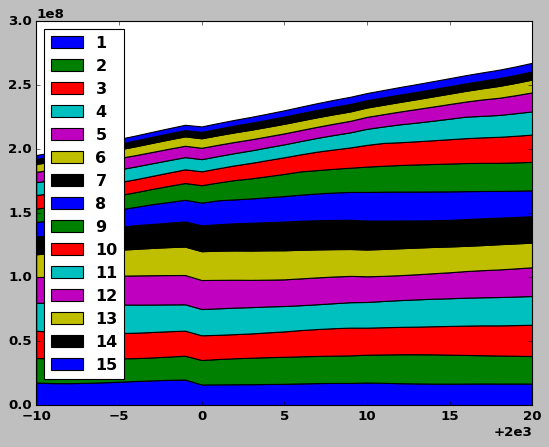

In [18]:
pop_year = pd.DataFrame(df_state.groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()
pop_year = set_estimates(pop_year)

age1 = pd.DataFrame(df_state[df_state['Age_group']==1].groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()
age1 = set_estimates(age1)

age2 = pd.DataFrame(df_state[df_state['Age_group']==2].groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()
age2 = set_estimates(age2)

age3 = pd.DataFrame(df_state[df_state['Age_group']==3].groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()
age3 = set_estimates(age3)

age4 = pd.DataFrame(df_state[df_state['Age_group']==4].groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()
age4 = set_estimates(age4)

age5 = pd.DataFrame(df_state[df_state['Age_group']==5].groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()
age5 = set_estimates(age5)

age6 = pd.DataFrame(df_state[df_state['Age_group']==6].groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()
age6 = set_estimates(age6)

age7 = pd.DataFrame(df_state[df_state['Age_group']==7].groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()
age7 = set_estimates(age7)

age8 = pd.DataFrame(df_state[df_state['Age_group']==8].groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()
age8 = set_estimates(age8)

age9 = pd.DataFrame(df_state[df_state['Age_group']==9].groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()
age9 = set_estimates(age9)

age10 = pd.DataFrame(df_state[df_state['Age_group']==10].groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()
age10 = set_estimates(age10)

age11 = pd.DataFrame(df_state[df_state['Age_group']==11].groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()
age11 = set_estimates(age11)

age12 = pd.DataFrame(df_state[df_state['Age_group']==12].groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()
age12= set_estimates(age12)

age13 = pd.DataFrame(df_state[df_state['Age_group']==13].groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()
age13 = set_estimates(age13)

age14 = pd.DataFrame(df_state[df_state['Age_group']==14].groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()
age14 = set_estimates(age14)

age15 = pd.DataFrame(df_state[df_state['Age_group']==15].groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()
age15 = set_estimates(age15)

labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
plt.stackplot(age1['Year'],np.vstack([age1['POPESTIMATE_SUB'].values,age2['POPESTIMATE_SUB'].values,
                                      age3['POPESTIMATE_SUB'].values,age4['POPESTIMATE_SUB'].values,
                                      age5['POPESTIMATE_SUB'].values,age6['POPESTIMATE_SUB'].values,
                                      age7['POPESTIMATE_SUB'].values,age8['POPESTIMATE_SUB'].values,
                                      age9['POPESTIMATE_SUB'].values,age10['POPESTIMATE_SUB'].values,
                                      age11['POPESTIMATE_SUB'].values,age12['POPESTIMATE_SUB'].values,
                                      age13['POPESTIMATE_SUB'].values,age14['POPESTIMATE_SUB'].values,
                                      age15['POPESTIMATE_SUB'].values]),labels=labels)

plt.legend(loc=2)

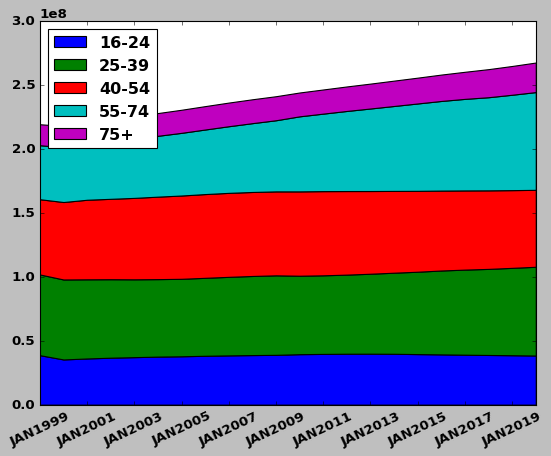

In [19]:
pop_year = pd.DataFrame(df_state.groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()
pop_year = set_estimates(pop_year)

age1 = pd.DataFrame(df_state[(df_state['Age_group']>=1)&(df_state['Age_group']<3)].groupby('Year')
                    ['POPESTIMATE_SUB'].sum()).reset_index()
age1 = set_estimates(age1).rename(columns={'POPESTIMATE_SUB':'age1'})

age2 = pd.DataFrame(df_state[(df_state['Age_group']>=3)&(df_state['Age_group']<6)].groupby('Year')
                    ['POPESTIMATE_SUB'].sum()).reset_index()
age2 = set_estimates(age2).rename(columns={'POPESTIMATE_SUB':'age2'})

age3 = pd.DataFrame(df_state[(df_state['Age_group']>=6)&(df_state['Age_group']<9)].groupby('Year')
                    ['POPESTIMATE_SUB'].sum()).reset_index()
age3 = set_estimates(age3).rename(columns={'POPESTIMATE_SUB':'age3'})

age4 = pd.DataFrame(df_state[(df_state['Age_group']>=9)&(df_state['Age_group']<13)].groupby('Year')
                    ['POPESTIMATE_SUB'].sum()).reset_index()
age4 = set_estimates(age4).rename(columns={'POPESTIMATE_SUB':'age4'})

age5 = pd.DataFrame(df_state[df_state['Age_group']>=13].groupby('Year')
                    ['POPESTIMATE_SUB'].sum()).reset_index()
age5 = set_estimates(age5).rename(columns={'POPESTIMATE_SUB':'age5'})

ages = reduce(lambda  left,right: pd.merge(left,right,on=['Year'], how='outer'), [age1, age2, age3, age4, age5])
ages = ages[ages.Year>1998].reset_index()

ages_perc = ages.divide(ages.sum(axis=1), axis=0)


#Change labels - these dont make sense
labels = ['16-24','25-39','40-54','55-74','75+']
plt.stackplot(np.arange(1999,2021,1),np.vstack([ages['age1'].values,ages['age2'].values,
                                      ages['age3'].values,ages['age4'].values,
                                      ages['age5'].values]),labels=labels)

plt.legend(loc=2)
# x = np.arange(0,260,24)
plt.xticks(np.arange(1999,2021,2),['JAN'+str(yr) for yr in range(1999,2021,2)],rotation=25)
plt.margins(x=0)

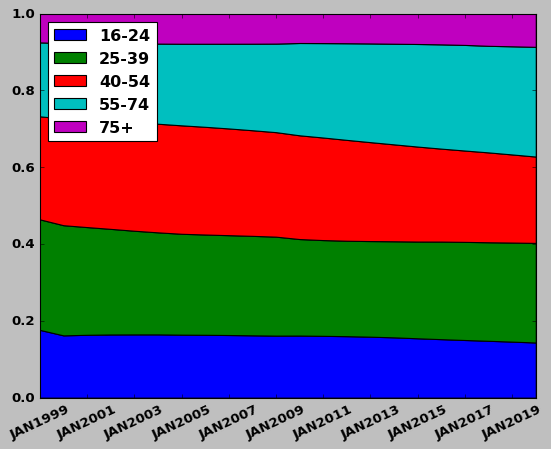

In [20]:
ages_perc = ages.divide(ages.sum(axis=1), axis=0)


#Change labels - these dont make sense
labels = ['16-24','25-39','40-54','55-74','75+']
plt.stackplot(np.arange(1999,2021,1),ages_perc['age1'].values,ages_perc['age2'].values,
                                      ages_perc['age3'].values,ages_perc['age4'].values,
                                      ages_perc['age5'].values,labels=labels)

plt.legend(loc=2)
# x = np.arange(0,260,24)
plt.xticks(np.arange(1999,2021,2),['JAN'+str(yr) for yr in range(1999,2021,2)],rotation=25)
plt.margins(x=0)

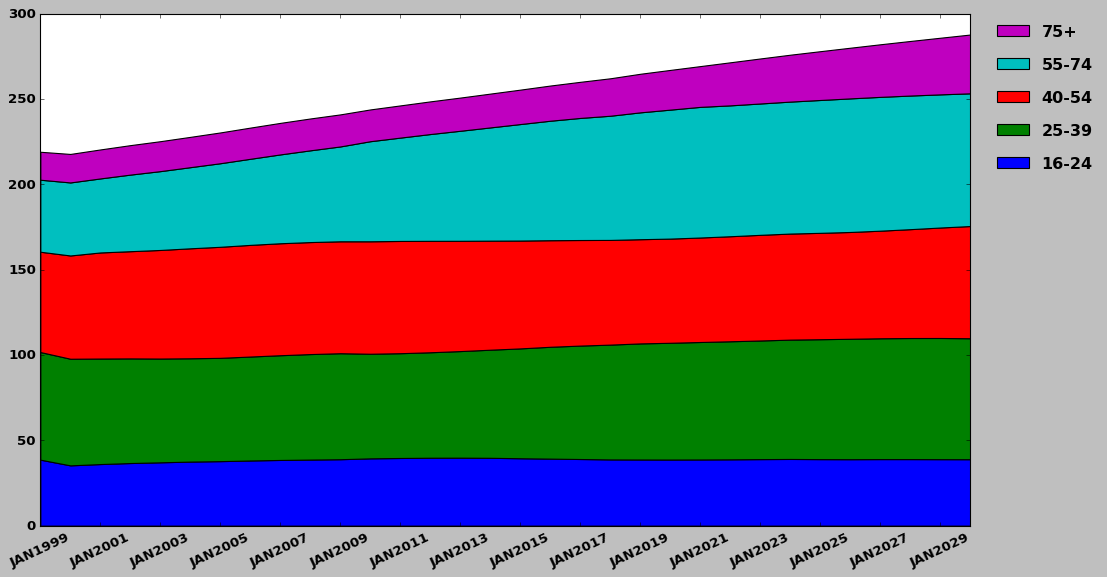

In [21]:
fig, ax = plt.subplots(figsize=(15,8))

pop_year = pd.DataFrame(df_population.groupby('Year')['POPESTIMATE_SUB'].sum()).reset_index()


age1 = pd.DataFrame(df_population[(df_population['Age_group']>=1)&(df_population['Age_group']<3)].groupby('Year')
                    ['POPESTIMATE_SUB'].sum()).reset_index().rename(columns={'POPESTIMATE_SUB':'age1'})
# age1 = set_estimates(age1).rename(columns={'POPESTIMATE_SUB':'age1'})

age2 = pd.DataFrame(df_population[(df_population['Age_group']>=3)&(df_population['Age_group']<6)].groupby('Year')
                    ['POPESTIMATE_SUB'].sum()).reset_index().rename(columns={'POPESTIMATE_SUB':'age2'})
# age2 = set_estimates(age2).rename(columns={'POPESTIMATE_SUB':'age2'})

age3 = pd.DataFrame(df_population[(df_population['Age_group']>=6)&(df_population['Age_group']<9)].groupby('Year')
                    ['POPESTIMATE_SUB'].sum()).reset_index().rename(columns={'POPESTIMATE_SUB':'age3'})
# age3 = set_estimates(age3).rename(columns={'POPESTIMATE_SUB':'age3'})

age4 = pd.DataFrame(df_population[(df_population['Age_group']>=9)&(df_population['Age_group']<13)].groupby('Year')
                    ['POPESTIMATE_SUB'].sum()).reset_index().rename(columns={'POPESTIMATE_SUB':'age4'})
# age4 = set_estimates(age4).rename(columns={'POPESTIMATE_SUB':'age4'})

age5 = pd.DataFrame(df_population[df_population['Age_group']>=13].groupby('Year')
                    ['POPESTIMATE_SUB'].sum()).reset_index().rename(columns={'POPESTIMATE_SUB':'age5'})
# age5 = set_estimates(age5).rename(columns={'POPESTIMATE_SUB':'age5'})

ages = reduce(lambda  left,right: pd.merge(left,right,on=['Year'], how='outer'), [age1, age2, age3, age4, age5])
# ages = ages[ages.Year>1998].reset_index()

ages_perc = ages.divide(ages.sum(axis=1), axis=0)


#Change labels - these dont make sense
labels = ['16-24','25-39','40-54','55-74','75+']
plt.stackplot(np.arange(1999,2031,1),np.vstack([ages['age1'].values/1000000,ages['age2'].values/1000000,
                                      ages['age3'].values/1000000,ages['age4'].values/1000000,
                                      ages['age5'].values/1000000]),labels=labels)

plt.legend(loc='upper center', bbox_to_anchor=(1.08, 0.75),labelspacing=-3,frameon=False,
          fancybox=True, shadow=True)
# x = np.arange(0,260,24)
plt.xticks(np.arange(1999,2031,2),['JAN'+str(yr) for yr in range(1999,2031,2)],rotation=25)
plt.margins(x=0)

Text(0.5, 0.95, 'Percentage of Population By Age Groups (Estimates and Projections)')

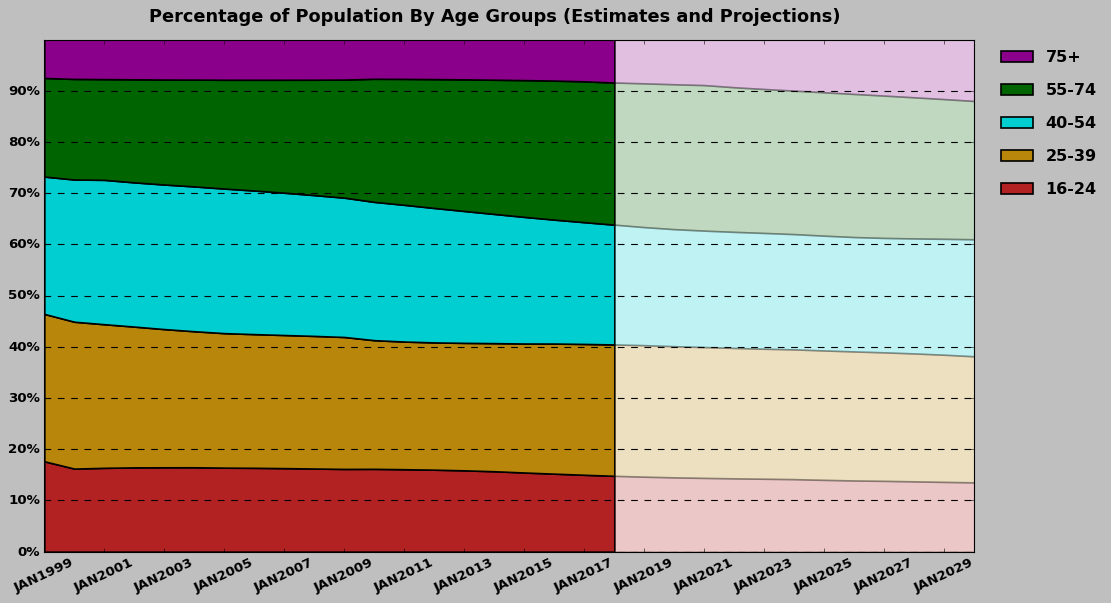

In [22]:
fig, ax = plt.subplots(figsize=(15,8))

ages_perc = ages.divide(ages.sum(axis=1), axis=0)
ages_perc1 = ages_perc[:-12]
ages_perc2 = ages_perc[-13:]

colormap = ['firebrick', 'darkgoldenrod', 'darkturquoise', 'darkgreen','darkmagenta']

#Change labels - these dont make sense
labels = ['16-24','25-39','40-54','55-74','75+']
plt.stackplot(np.arange(1999,2019,1),ages_perc1['age1'].values,ages_perc1['age2'].values,
                                      ages_perc1['age3'].values,ages_perc1['age4'].values,
                                      ages_perc1['age5'].values,labels=labels,lw=1.5,colors=colormap)

plt.legend(loc=2)
# x = np.arange(0,260,24)
# plt.xticks(np.arange(1999,2019,2),['JAN'+str(yr) for yr in range(1999,2019,2)],rotation=25)
plt.margins(x=0)

#Change labels - these dont make sense
# labels = ['16-24 Projected','25-39 Projected','40-54 Projected','55-74 Projected','75+ Projected']
plt.stackplot(np.arange(2018,2031,1),ages_perc2['age1'].values,ages_perc2['age2'].values,
                                      ages_perc2['age3'].values,ages_perc2['age4'].values,
                                      ages_perc2['age5'].values,colors=colormap,lw=1.5,alpha=0.25)

plt.legend(loc='upper center', bbox_to_anchor=(1.08, 0.75),labelspacing=-3,frameon=False,
          fancybox=True, shadow=True)
ax.yaxis.grid(linestyle='--',lw=1)
plt.xticks(np.arange(1999,2031,2),['JAN'+str(yr) for yr in range(1999,2031,2)],rotation=25)
plt.yticks(np.arange(0,1,.1),['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%'])
plt.margins(x=0)
# plt.title('Percentage of Population By Age Groups (Estimates and Projections)')
plt.suptitle('Percentage of Population By Age Groups (Estimates and Projections)',weight='bold', size=16, y=0.95)
# plt.text(0.17, 0.74,'-> Projections',
#      horizontalalignment='center',
#      verticalalignment='center',
#      transform = ax.transAxes)



In [23]:
ages_perc[-12:]

,Year,age1,age2,age3,age4,age5
20,0.000008,0.146470,0.256857,0.230572,0.280725,0.085369
21,0.000008,0.145129,0.256181,0.228588,0.282987,0.087107
22,0.000008,0.144084,0.255583,0.227352,0.284260,0.088714
23,0.000007,0.143188,0.254764,0.226679,0.282420,0.092942
24,0.000007,0.142446,0.253928,0.226128,0.281133,0.096358
25,0.000007,0.141658,0.253384,0.225183,0.280198,0.099569
26,0.000007,0.140250,0.252732,0.224192,0.279998,0.102821
27,0.000007,0.139086,0.251994,0.223409,0.279485,0.106019
28,0.000007,0.138306,0.250976,0.223494,0.277979,0.109238
29,0.000007,0.137350,0.249801,0.224596,0.275649,0.112596


In [24]:
ages[:-12]

,Year,age1,age2,age3,age4,age5
0,1999,38676031,63060955,58771947,42196935,16378932
1,2000,35340440,62476837,60506537,42787727,16699098
2,2001,36102881,61828580,62163506,43373702,16978072
3,2002,36702029,61312245,62815202,44877972,17260729
4,2003,37125689,60806795,63620374,46186721,17542116
5,2004,37554593,60527324,64443403,47534649,17761707
6,2005,37812305,60530866,65068653,48961608,18038060
7,2006,38204277,60902814,65423955,50445714,18269767
8,2007,38510545,61363772,65607262,52056942,18477841
9,2008,38742194,61804279,65627834,53761968,18660908


In [25]:
pop_year = pd.DataFrame(df_pops.groupby('Year')['POPESTIMATE'].sum()).reset_index()
pop_year = set_estimates(pop_year)

males = pd.DataFrame(df_pops[df_pops['Sex']=='Male'].groupby('Year')['POPESTIMATE'].sum()).reset_index()
males = set_estimates(males)

females = pd.DataFrame(df_pops[df_pops['Sex']=='Female'].groupby('Year')['POPESTIMATE'].sum()).reset_index()
females = set_estimates(females)

labels = ['Male','Female']
plt.stackplot(males['Year'],np.vstack([males['POPESTIMATE'].values,females['POPESTIMATE'].values]),labels=labels)

KeyError: 'POPESTIMATE_SUB'

In [26]:
hispanic = pd.DataFrame(df_pops[df_pops['Hispanic']=='Hispanic'].groupby('Year')['POPESTIMATE'].sum()).reset_index()
hispanic = set_estimates(hispanic)

not_hispanic = pd.DataFrame(df_pops[df_pops['Hispanic']=='Not Hispanic'].groupby('Year')['POPESTIMATE'].sum()).reset_index()
not_hispanic = set_estimates(not_hispanic)

labels = ['Male','Female']
plt.stackplot(hispanic['Year'],np.vstack([hispanic['POPESTIMATE'].values,not_hispanic['POPESTIMATE'].values]),
              labels=labels)

KeyError: 'POPESTIMATE_SUB'

In [27]:
hispanic_male = pd.DataFrame(df_pops[(df_pops['Hispanic']=='Hispanic')&(df_pops['Sex']=='Male')].groupby('Year')['POPESTIMATE'].sum()).reset_index()
hispanic_male = set_estimates(hispanic_male)

not_hispanic_male = pd.DataFrame(df_pops[(df_pops['Hispanic']=='Not Hispanic')&(df_pops['Sex']=='Male')].groupby('Year')['POPESTIMATE'].sum()).reset_index()
not_hispanic_male = set_estimates(not_hispanic_male)

hispanic_female = pd.DataFrame(df_pops[(df_pops['Hispanic']=='Hispanic')&(df_pops['Sex']=='Female')].groupby('Year')['POPESTIMATE'].sum()).reset_index()
hispanic_female = set_estimates(hispanic_female)

not_hispanic_female = pd.DataFrame(df_pops[(df_pops['Hispanic']=='Not Hispanic')&(df_pops['Sex']=='Female')].groupby('Year')['POPESTIMATE'].sum()).reset_index()
not_hispanic_female = set_estimates(not_hispanic_female)

labels = ['Hispanic Male','Not Hispanic Male','Hispanic Female','Not Hispanic Female']
plt.stackplot(hispanic['Year'],np.vstack([hispanic_male['POPESTIMATE'].values,
    not_hispanic_male['POPESTIMATE'].values,hispanic_female['POPESTIMATE'].values,
    not_hispanic_female['POPESTIMATE'].values]),labels=labels)

KeyError: 'POPESTIMATE_SUB'

In [28]:
df_sub[df_sub['Pop_percentage']>0.01]

,Year,Month,SubPop,Pop_percentage,U3_Rate,U3_LFPR,U6_Rate,U6_LFPR,YearMonth
0,1999,jan,[{'Sex': 'Female'}],0.516410,0.044290,0.599821,0.089043,0.615903,1999jan
1,1999,jan,[{'Sex': 'Male'}],0.483590,0.050287,0.741255,0.080555,0.755701,1999jan
2,1999,jan,[{'Race': 'White Only'}],0.837618,0.043095,0.670979,0.076335,0.684586,1999jan
3,1999,jan,[{'Race': 'Black Only'}],0.117202,0.080096,0.634833,0.144359,0.661560,1999jan
4,1999,jan,[{'Hispanic': 'Hispanic'}],0.102363,0.074910,0.681266,0.126174,0.701421,1999jan
...,...,...,...,...,...,...,...,...,...
193170,2020,aug,"[{'Age_group': (8, 9)}, {'Marital_status': 'Ma...",0.011316,0.047927,0.807531,0.077806,0.820084,2020aug
193173,2020,aug,"[{'Age_group': (9, 10)}, {'Marital_status': 'M...",0.044721,0.058454,0.635344,0.101838,0.651047,2020aug
193175,2020,aug,"[{'Age_group': (9, 10)}, {'Marital_status': 'M...",0.024785,0.046865,0.726967,0.078811,0.742802,2020aug
193176,2020,aug,"[{'Age_group': (9, 10)}, {'Marital_status': 'M...",0.010774,0.041727,0.766262,0.079096,0.780595,2020aug


In [29]:
df_sub

,Year,Month,SubPop,Pop_percentage,U3_Rate,U3_LFPR,U6_Rate,U6_LFPR,YearMonth
0,1999,jan,[{'Sex': 'Female'}],0.516410,0.044290,0.599821,0.089043,0.615903,1999jan
1,1999,jan,[{'Sex': 'Male'}],0.483590,0.050287,0.741255,0.080555,0.755701,1999jan
2,1999,jan,[{'Race': 'White Only'}],0.837618,0.043095,0.670979,0.076335,0.684586,1999jan
3,1999,jan,[{'Race': 'Black Only'}],0.117202,0.080096,0.634833,0.144359,0.661560,1999jan
4,1999,jan,[{'Hispanic': 'Hispanic'}],0.102363,0.074910,0.681266,0.126174,0.701421,1999jan
...,...,...,...,...,...,...,...,...,...
193175,2020,aug,"[{'Age_group': (9, 10)}, {'Marital_status': 'M...",0.024785,0.046865,0.726967,0.078811,0.742802,2020aug
193176,2020,aug,"[{'Age_group': (9, 10)}, {'Marital_status': 'M...",0.010774,0.041727,0.766262,0.079096,0.780595,2020aug
193177,2020,aug,"[{'Age_group': (9, 10)}, {'Marital_status': 'M...",0.011296,0.050204,0.721135,0.077025,0.736791,2020aug
193178,2020,aug,"[{'Age_group': (9, 10)}, {'Marital_status': 'M...",0.001918,0.015152,0.800000,0.044444,0.818182,2020aug
